# **Dataset on the growth of Streamers during Pandemic**

*A detailed interpretation and analysis of the data gathered from the streamers in Facebook and Twitch*

---

### Potential uses of the Dataset

This Dataset can be used by organizations to help them determine how different individuals cope up with the quarantine. <br>
In addition, this dataset can also be used to show how the streaming community grew during the pandemic.

### Data gathering process

*This part will discuss how our team gathered the current data in our dataset, and the obstacles we have run to as we collect these data.*

Since **Facebook and Twitch, our primary source of data,** does **not allow** or for in the case of Twitch, has an API but doesn't provide access to historical information, our team decided to gather these data **manually**. We spent days gathering these data because one of our variables involves the date when the streamers have started dtreaming and unluckily, most of the streamers doesn't include it on the information of their pages. Thus, we have to scroll and look for their first video content or first live stream, so that we can determine when the started. In addition to this, we also wanted to inform everyone that due to the time constraints, we were unable to contact the streamers and inform them that we will be using their information for this project, we just assumed that there will be no problem since the data that we have collected were displayed publicly in their pages. So if some are planning to use it for other purposes, it might be better to contact the streamers first for data privacy concerns. 

### Information about the data gathered

*In this part, we are to discuss the information on the current dataset that we have and give the interpretation and analyzation for each*

From a total of **253 streamers** in our dataset, we will show you the:<br>
**Bivariate** <br>
- Genders of the streamers in the dataset
- Age of the streamers in the dataset
- Country of the streamers in the dataset
- Top 20 streamers with most followers based from the current dataset
- Percentage on which platform is most commonly used by the streamers in the data set.
- Percentage on the number of streamers per gaming community in the dataset. (Top 1,2,3 games of each streamer)
- Year that the streamers in the dataset started. 
<br>
**Multivariate** <br>
- Relationship between Age and Platform used
- Relationship between Gender and Platform used
- Relation between Gender and the games played by the streamers. (Top 1,2,3 games of each streamer)
- Year started of the top 20 streamers (based on their followers).
- Gender of the top 20 streamers (based on their followers).

---

#### Coding Process before analyzing each variable

**Step 1.** Import all necessary packages

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from scipy.stats import pearsonr

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Step 2.** Open and read the DataSet

In [40]:
#open the data set
data = pd.read_csv('streamers.csv')
data

,page_name,gender_streamer,age,country,num_followers,platform,streamed_game1,streamed_game2,streamed_game3,date_started,page_link
0,burg,male,18,Philippines,169022,Facebook,Valorant,Phasmophobia,Rust,5/22/2020,https://www.facebook.com/gaming/rsnburg
1,Razzie Binx,male,0,Philippines,797062,Facebook,Valorant,Mobile Legends,At Dead of Night,2/28/2015,https://www.facebook.com/gaming/RealRazzieBinx
2,Ling2x,female,0,Philippines,159088,Facebook,Valorant,APEX Legends,Call Of Duty: Warzone,10/26/2017,https://www.facebook.com/gaming/L1NG2X
3,Juweljems,male,17,Philippines,7320,Facebook,Valorant,Phasmophobia,Among Us,8/21/2020,https://www.facebook.com/gaming/juweljems
4,Diviny,female,0,Philippines,32456,Facebook,Valorant,APEX Legends,Phasmophobia,05/10/2018,https://www.facebook.com/gaming/ddiviny
...,...,...,...,...,...,...,...,...,...,...,...
248,Konnichiwa Gaming,male,0,Philippines,483,Facebook,Valorant,Fall Guys,DOTA 2,9/30/2020,https://www.facebook.com/KonnichiwaGaming
249,Larong Tito,male,0,Philippines,164,Facebook,Mobile Legends,unavailable,unavailable,6/13/2020,https://www.facebook.com/Larong-Tito-107434337...
250,FLTCasul,male,0,unavailable,45,Facebook,Nioh 2,Sekiro,unavailable,02/09/2021,https://www.facebook.com/FLTCasul
251,XIV,male,0,Philippines,446,Facebook,Valorant,Among Us,Ragnarok Online,1/23/2020,https://www.facebook.com/XIVGamingPH


**Step 3.** Check how many data we have gathered and also the data type of each column

In [6]:
len(data)

253

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   page_name                       253 non-null    object
 1   gender_streamer                 253 non-null    object
 2   age                             253 non-null    int64 
 3   country                         253 non-null    object
 4   num_followers (as of may 2021)  253 non-null    int64 
 5   platform                        253 non-null    object
 6   streamed_game1                  253 non-null    object
 7   streamed_game2                  253 non-null    object
 8   streamed_game3                  253 non-null    object
 9   date_started                    253 non-null    object
 10  page_link                       253 non-null    object
dtypes: int64(2), object(9)
memory usage: 21.9+ KB


**Step 4.** Since the column *date_started* is listed as an object, we convert it to datetime

In [41]:
data['date_started'] = data['date_started'].apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   page_name        253 non-null    object        
 1   gender_streamer  253 non-null    object        
 2   age              253 non-null    int64         
 3   country          253 non-null    object        
 4   num_followers    253 non-null    int64         
 5   platform         253 non-null    object        
 6   streamed_game1   253 non-null    object        
 7   streamed_game2   253 non-null    object        
 8   streamed_game3   253 non-null    object        
 9   date_started     253 non-null    datetime64[ns]
 10  page_link        253 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 21.9+ KB


**Step 5.** Having the date_started of each streamer, we only wanted the year they have started streaming, thus we create a new column for it.

In [42]:
data['year_started'] = data['date_started'].dt.year
data.head()

,page_name,gender_streamer,age,country,num_followers,platform,streamed_game1,streamed_game2,streamed_game3,date_started,page_link,year_started
0,burg,male,18,Philippines,169022,Facebook,Valorant,Phasmophobia,Rust,2020-05-22,https://www.facebook.com/gaming/rsnburg,2020
1,Razzie Binx,male,0,Philippines,797062,Facebook,Valorant,Mobile Legends,At Dead of Night,2015-02-28,https://www.facebook.com/gaming/RealRazzieBinx,2015
2,Ling2x,female,0,Philippines,159088,Facebook,Valorant,APEX Legends,Call Of Duty: Warzone,2017-10-26,https://www.facebook.com/gaming/L1NG2X,2017
3,Juweljems,male,17,Philippines,7320,Facebook,Valorant,Phasmophobia,Among Us,2020-08-21,https://www.facebook.com/gaming/juweljems,2020
4,Diviny,female,0,Philippines,32456,Facebook,Valorant,APEX Legends,Phasmophobia,2018-05-10,https://www.facebook.com/gaming/ddiviny,2018


##### With our data organized, we can now start analyzing the data set.

---

### Gender of Streamers

In [24]:
#Create a new table that will contain the number of male and female streamers in our data set

gender_table = data["gender_streamer"].value_counts().rename_axis('gender').reset_index(name='counts')
gender_table

,gender,counts
0,male,169
1,female,84


Text(0.5, 1.0, 'Bar graph of the gender of streamers')

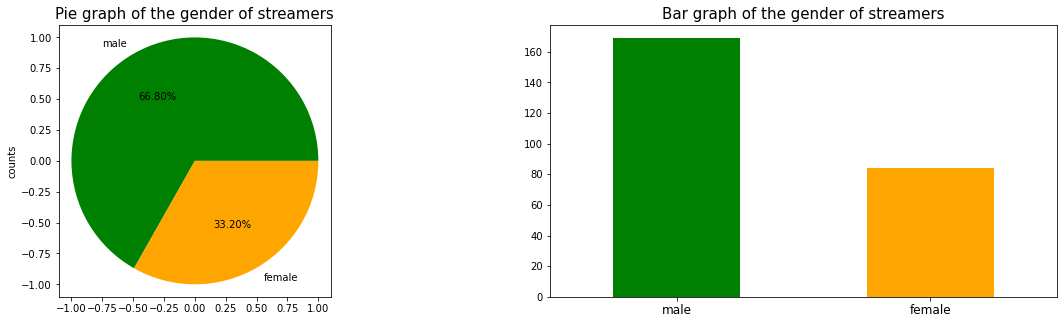

In [14]:
# Create a pie and bar graph that will graphically represent he table
fig = plt.figure(figsize=(20, 5))
ax = fig.add_gridspec(1,2)
pie = fig.add_subplot(ax[0, 0])
bar = fig.add_subplot(ax[0, 1])


gender_pie = gender_table['counts'].plot(ax=pie, kind='pie', labels = ["male","female"], colors = ["green", "orange"],autopct='%1.2f%%',frame = True)
pie.set_title('Pie graph of the gender of streamers', fontsize=15)

gender_bar = gender_table['counts'].plot(ax=bar, kind='bar',color = ["green","orange"], width=0.5 )
bar.set_xticklabels(['male','female'], rotation=0, fontsize=12)
bar.set_title('Bar graph of the gender of streamers', fontsize=15)


#### **Observation**

### Age of Streamers

In [15]:
#Create a table that will categorize each streamer in the dataset according to their age

age_table = data["age"].value_counts().rename_axis('age').reset_index(name='counts')
age_table = age_table.sort_values(by=['age'])
age_table

,age,counts
0,0,230
5,17,2
6,18,1
3,19,3
2,20,4
4,21,3
1,22,5
7,23,1
8,28,1
9,30,1


[(0.0, 10.0)]

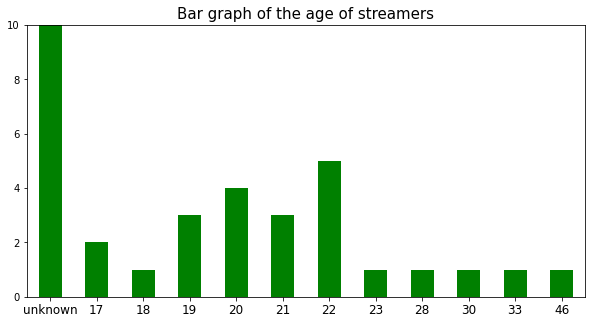

In [16]:
#Create a bar graph to graphically represent the table that we got.
fig = plt.figure(figsize=(10, 5))
ax = fig.add_gridspec(1,1)
bar = fig.add_subplot(ax[0, 0])

age_bar = age_table['counts'].plot(ax=bar, kind='bar', width=0.5, color="green" )
bar.set_title('Bar graph of the age of streamers', fontsize=15)
bar.set_xticklabels(['unknown', '17','18','19','20','21','22','23','28','30','33','46'], rotation=0, fontsize=12)
bar.set(ylim=(0,10))

#### **Observation**

### Country of Streamers

In [25]:
#Create a table that will categorize each streamer in the dataset according to their country
country_table = data['country'].value_counts().rename_axis('country').reset_index(name='counts')
country_table

,country,counts
0,Philippines,174
1,unavailable,38
2,US,11
3,France,5
4,Canada,4
5,Spain,3
6,Russia,2
7,Turkey,2
8,Singapore,2
9,UK,2


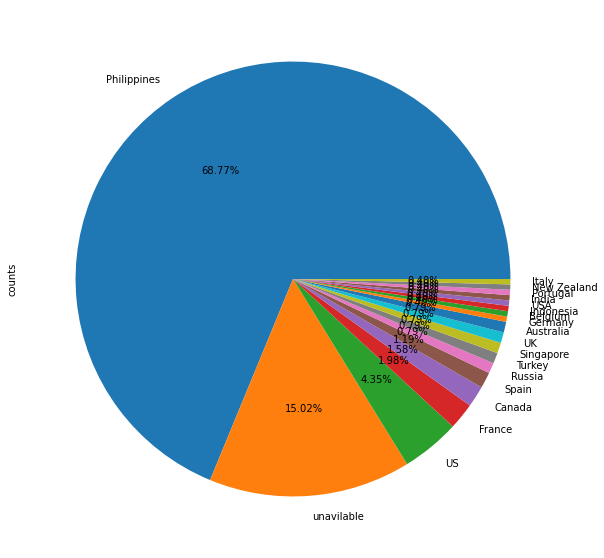

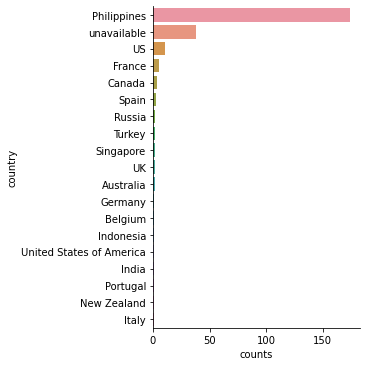

In [19]:
#Create a bar graph to graphically represent the table that we got.
fig = plt.figure(figsize=(20, 10))

country_pie = country_table['counts'].plot( kind='pie', labels = ['Philippines',"unavilable", 'US','France',
                                                                   'Canada','Spain','Russia','Turkey','Singapore','UK','Australia',
                                                                 'Germany','Belgium','Indonesia', 'USA',
                                                                  'India','Portugal','New Zealand','Italy']
                                     ,autopct='%1.2f%%')
pie.set_title('Pie graph ', fontsize=15)
fig.set_facecolor('white')

country_plot = sns.catplot(y="country", x="counts", orient="h", kind="bar", data=country_table)

#### **Observation**

### Platform used by the streamers

In [26]:
#Create a table that will categorize each streamer in the dataset according to their age

plat_table = data["platform"].value_counts().rename_axis('platform').reset_index(name='counts')
plat_table

,platform,counts
0,Facebook,174
1,Twitch,79


Text(0.5, 1.0, 'Bar graph of the platforms used by streamers')

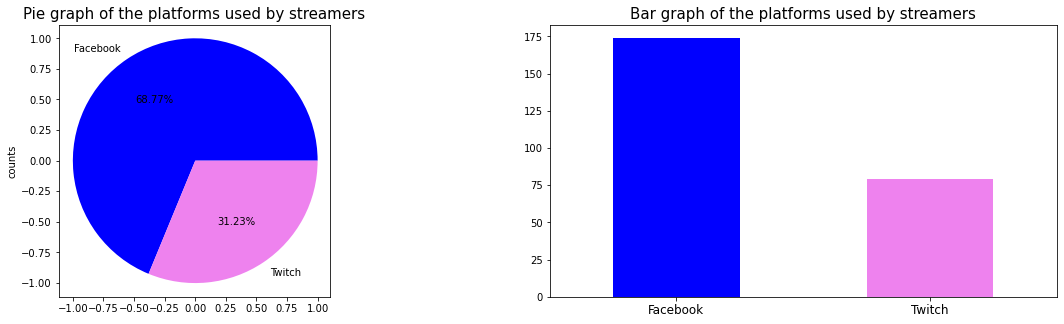

In [27]:
# Create a pie and bar graph that will graphically represent he table
fig = plt.figure(figsize=(20, 5))
ax = fig.add_gridspec(1,2)
pie = fig.add_subplot(ax[0, 0])
bar = fig.add_subplot(ax[0, 1])


plat_pie = plat_table['counts'].plot(ax=pie, kind='pie', labels = ["Facebook","Twitch"], colors = ["blue", "violet"],autopct='%1.2f%%',frame = True)
pie.set_title('Pie graph of the platforms used by streamers', fontsize=15)

plat_bar = plat_table['counts'].plot(ax=bar, kind='bar',color = ["blue","violet"], width=0.5 )
bar.set_xticklabels(['Facebook','Twitch'], rotation=0, fontsize=12)
bar.set_title('Bar graph of the platforms used by streamers', fontsize=15)


#### **Observation**

### Top 20 Streamers according to followers

In [97]:
#Create a table that will get the top 10 streamers with highest followers 
followers_table = data.nlargest(20, 'num_followers')
followers_table

,page_name,gender_streamer,age,country,num_followers,platform,streamed_game1,streamed_game2,streamed_game3,date_started,page_link,year_started
69,ChooxTv,male,30,Philippines,9900000,Facebook,Mobile Legends,unavailable,unavailable,2017-08-19,https://www.facebook.com/CHoOxTV,2017
61,Alodia Gosiengfiao,female,33,Philippines,7491615,Facebook,Valorant,Warzone,League of Legends,2018-03-14,https://www.facebook.com/AlodiaGosiengfiao/?re...,2018
167,Akosi Dogie,male,0,Philippines,6854756,Facebook,Mobile Legends,unavailable,unavailable,2017-07-03,https://www.facebook.com/AkoSiDogie,2017
154,Dexie Diaz,female,0,Philippines,6000000,Facebook,APEX Legends,Mobile Legends,Wild Rift,2018-11-14,https://www.facebook.com/DexienessDiaz,2018
56,Anne B. Mateo,female,28,Philippines,5400000,Facebook,Warzone,Valorant,PUBG,2017-04-26,https://www.facebook.com/annbmateo,2017
66,GHOST Wrecker,male,0,Philippines,4792591,Facebook,Mobile Legends,Rules of Survival,unavailable,2018-08-10,https://www.facebook.com/ghostwrecker28,2018
153,Megan Young,female,0,unavailable,4200000,Facebook,Among Us,Wild Rift,unavailable,2010-06-21,https://www.facebook.com/MeganYoungPage,2010
63,Renejay,male,17,Philippines,3600000,Facebook,Mobile Legends,unavailable,unavailable,2019-07-30,https://www.facebook.com/Renejayofficial,2019
252,RanbooLive,male,0,United States of America,2804352,Twitch,Minecraft,Slime Rancher,Little Nightmares,2020-09-12,https://www.twitch.tv/ranboolive,2020
169,Z4pnu,male,0,unavailable,2673633,Facebook,Mobile Legends,unavailable,unavailable,2017-10-11,https://www.facebook.com/z4pnu/,2017


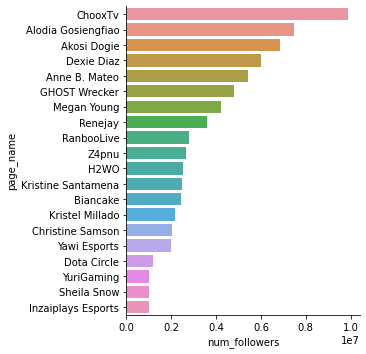

In [98]:
followers_plot = sns.catplot(y="page_name", x="num_followers", orient="h", kind="bar", data=followers_table)

#### **Observation**

### Top Games played by the streamers in our data set

In [34]:
#Create a table that will categorize each streamer in the dataset according to the top game they are playing
games1_table = data['streamed_game1'].value_counts().rename_axis('game').reset_index(name='counts')
games1_table=games1_table.nlargest(10, 'counts')
games1_table

,game,counts
0,Valorant,111
1,Genshin Impact,49
2,Mobile Legends,26
3,DOTA 2,11
4,Minecraft,6
5,League of Legends,6
6,Call of Duty: Mobile,6
7,Grand Theft Auto V,5
8,APEX Legends,4
9,PUBG,3


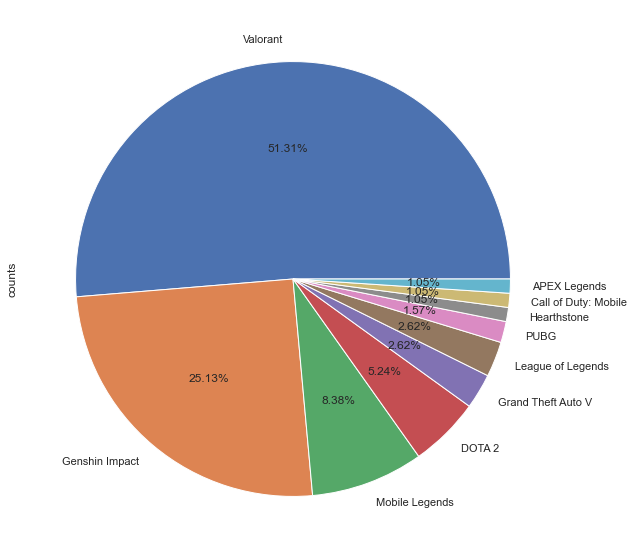

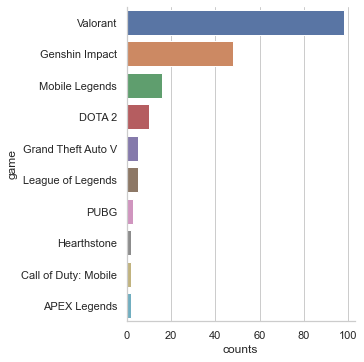

In [176]:

#Create a pie and bar graph to graphically represent the table that we got.
fig = plt.figure(figsize=(20, 10))


games1_pie = games1_table['counts'].plot( kind='pie', labels = ['Valorant', 'Genshin Impact','Mobile Legends',
                                                                   'DOTA 2','Minecraft','League of Legends',
                                                                   'Call of Duty: Mobile','Grand Theft Auto V','APEX Legends', 'PUBG']
                                     ,autopct='%1.2f%%')
pie.set_title('Pie graph ', fontsize=15)
fig.set_facecolor('white')

games1_plot = sns.catplot(y="game", x="counts", orient="h", kind="bar", data=games1_table)

#### **Observation**

In [35]:
#Create a table that will categorize each streamer in the dataset according to the second top game they are playing
games2_table = data['streamed_game2'].value_counts().rename_axis('game').reset_index(name='counts')
games2_table =games2_table.nlargest(10, 'counts')
games2_table

,game,counts
0,unavailable,92
1,League of Legends,17
2,Valorant,15
3,Mobile Legends,15
4,DOTA 2,9
5,PUBG,8
6,Genshin Impact,8
7,Phasmophobia,6
8,APEX Legends,6
9,Fortnite,5


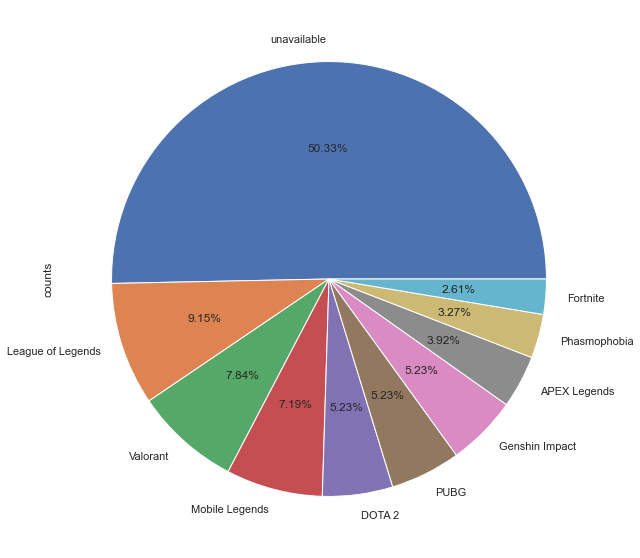

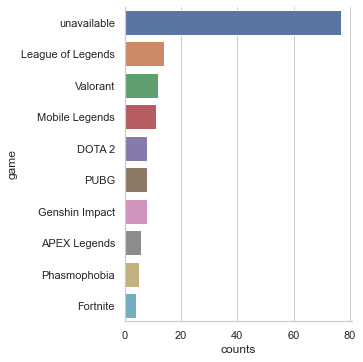

In [177]:
#Create a pie and bar graph to graphically represent the table that we got.

fig = plt.figure(figsize=(20, 10))


games2_pie = games2_table['counts'].plot( kind='pie', labels = ['unavailable', 'League of Legends','Valorant',
                                                                   'Mobile Legends','DOTA 2','PUBG',
                                                                   'Genshin Impact','APEX Legends','Phasmophobia','Fortnite']
                                     ,autopct='%1.2f%%')
pie.set_title('Pie graph ', fontsize=15)
fig.set_facecolor('white')

games2_plot = sns.catplot(y="game", x="counts", orient="h", kind="bar", data=games2_table)

#### **Observation**

In [37]:
#Create a table that will categorize each streamer in the dataset according to the third top game they are playing
games3_table = data['streamed_game3'].value_counts().rename_axis('game').reset_index(name='counts')
games3_table = games3_table.nlargest(10, 'counts')
games3_table

,game,counts
0,unavailable,145
1,League of Legends,9
2,Mobile Legends,6
3,Valorant,6
4,PUBG,5
5,Fortnite,4
6,Among Us,4
7,Call Of Duty: Warzone,4
8,APEX Legends,4
9,CS:GO,4


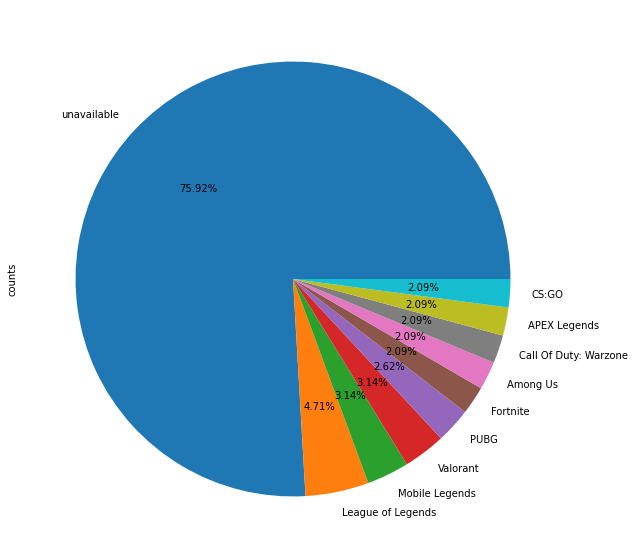

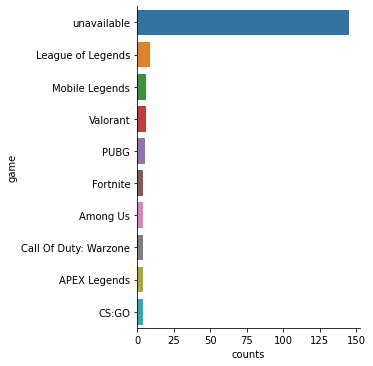

In [38]:
#Create a pie and bar graph to graphically represent the table that we got.

fig = plt.figure(figsize=(20, 10))

games3_pie = games3_table['counts'].plot( kind='pie', labels = ['unavailable', 'League of Legends','Mobile Legends','Valorant','PUBG','Fortnite',
                                                                'Among Us','Call Of Duty: Warzone','APEX Legends','CS:GO']
                                                                    ,autopct='%1.2f%%')
pie.set_title('Pie graph ', fontsize=15)
fig.set_facecolor('white')

games3_plot = sns.catplot(y="game", x="counts", orient="h", kind="bar", data=games3_table)

### Year started

In [43]:
#Create a table that will categorize each streamer in the dataset according to the year they started
year_table = data['year_started'].value_counts().rename_axis('year').reset_index(name='counts')
year_table=year_table.sort_values(by=['year'])
year_table

,year,counts
8,2010,1
9,2011,1
10,2012,1
11,2013,1
6,2014,10
7,2015,9
5,2016,11
4,2017,18
3,2018,19
2,2019,35


[Text(0, 0, '2010'),
 Text(1, 0, '2011'),
 Text(2, 0, '2012'),
 Text(3, 0, '2013'),
 Text(4, 0, '2014'),
 Text(5, 0, '2015'),
 Text(6, 0, '2016'),
 Text(7, 0, '2017'),
 Text(8, 0, '2018'),
 Text(9, 0, '2019'),
 Text(10, 0, '2020'),
 Text(11, 0, '2021')]

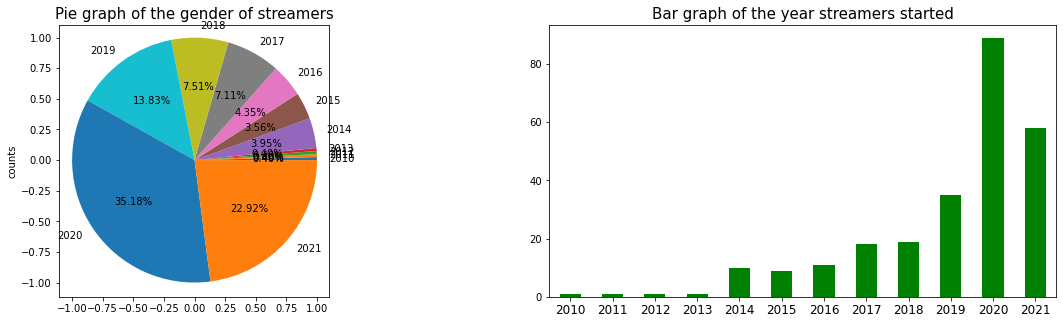

In [44]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_gridspec(1,2)
pie = fig.add_subplot(ax[0, 0])
bar = fig.add_subplot(ax[0, 1])

year_pie = year_table['counts'].plot(ax=pie, kind='pie', labels = ['2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
                                     ,autopct='%1.2f%%',frame = True)
pie.set_title('Pie graph of the gender of streamers', fontsize=15)

year_bar = year_table['counts'].plot(ax=bar, kind='bar', width=0.5, color="green" )
bar.set_title('Bar graph of the year streamers started', fontsize=15)
bar.set_xticklabels(['2010', '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'], rotation=0, fontsize=12)

#### **Observation**

### Age and Platform Used

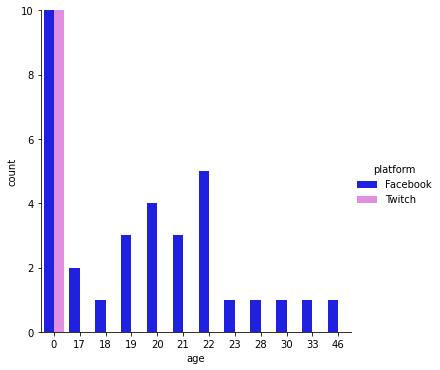

In [53]:
age_plat_plot = sns.catplot(x="age", 
                                   kind="count", 
                                   hue="platform", 
                                   palette={"Facebook": "blue", "Twitch": "violet"}, 
                                   data=data)
age_plat_plot.set(ylim=(0,10))

#### **Observation**

### Gender and Platform Used

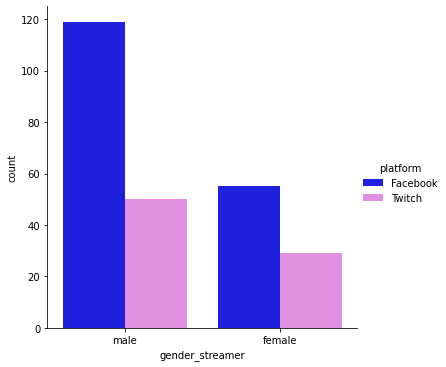

In [54]:
gender_plat_plot = sns.catplot(x="gender_streamer", 
                                   kind="count", 
                                   hue="platform", 
                                   palette={"Facebook": "blue", "Twitch": "violet"}, 
                                   data=data)

#### **Observation**

### Gender and games played

In [70]:
addgender1 = data.groupby(['streamed_game1','gender_streamer']).size().reset_index(name='count')
final1 = addgender1
top1_final10 = final1[final1.streamed_game1.isin(games1_table['game'])]
top1_final10

,streamed_game1,gender_streamer,count
0,APEX Legends,female,1
1,APEX Legends,male,3
4,Call of Duty: Mobile,female,4
5,Call of Duty: Mobile,male,2
8,DOTA 2,female,4
9,DOTA 2,male,7
14,Genshin Impact,female,13
15,Genshin Impact,male,36
17,Grand Theft Auto V,female,3
18,Grand Theft Auto V,male,2


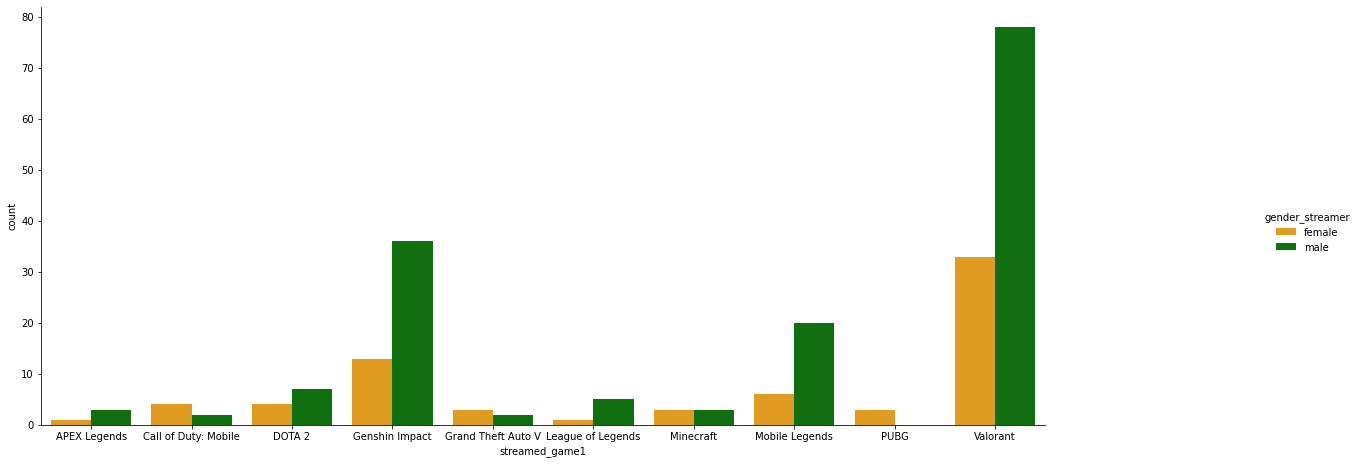

In [87]:
gender_plat_plot = sns.catplot(x="streamed_game1", y="count",
                                   kind="bar", 
                                   hue="gender_streamer", 
                                   palette={"male": "green", "female": "orange"}, 
                                   data=top1_final10)
gender_plat_plot.fig.set_size_inches(20, 6.5)

#### **Observation**

In [92]:
addgender2 = data.groupby(['streamed_game2','gender_streamer']).size().reset_index(name='count')
final2 = addgender2
top2_final10 = final2[final2.streamed_game2.isin(games2_table['game'])]
top2_final10

,streamed_game2,gender_streamer,count
0,APEX Legends,female,3
1,APEX Legends,male,3
15,DOTA 2,female,4
16,DOTA 2,male,5
25,Fortnite,male,5
26,Genshin Impact,female,2
27,Genshin Impact,male,6
32,League of Legends,female,10
33,League of Legends,male,7
38,Mobile Legends,female,6


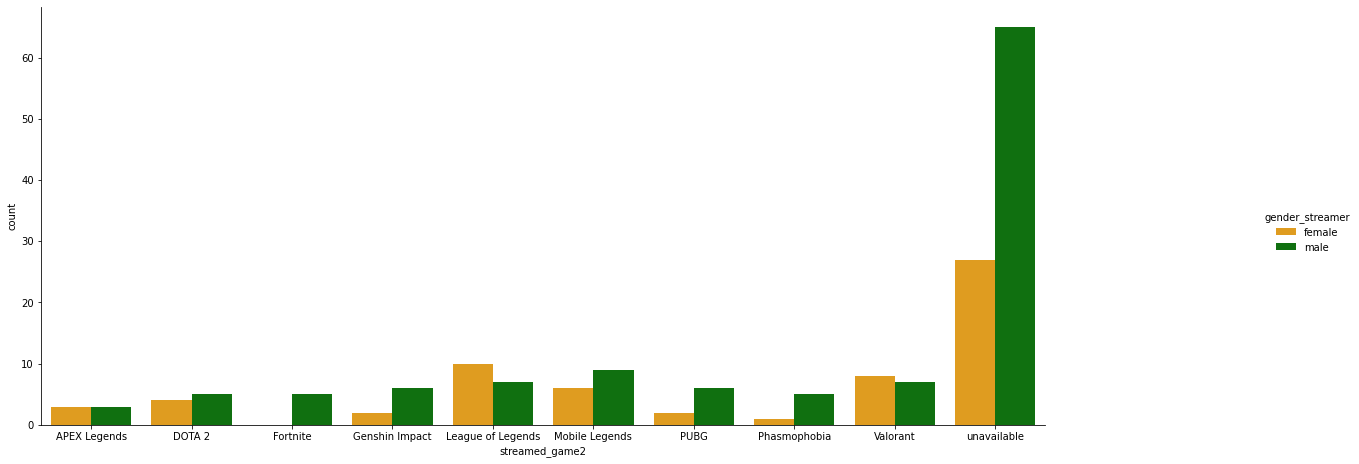

In [93]:
gender_plat2_plot = sns.catplot(x="streamed_game2", y="count",
                                   kind="bar", 
                                   hue="gender_streamer", 
                                   palette={"male": "green", "female": "orange"}, 
                                   data=top2_final10)
gender_plat2_plot.fig.set_size_inches(20, 6.5)

#### **Observation**

In [94]:
addgender3 = data.groupby(['streamed_game3','gender_streamer']).size().reset_index(name='count')
final3 = addgender3
top3_final10 = final3[final3.streamed_game3.isin(games3_table['game'])]
top3_final10

,streamed_game3,gender_streamer,count
0,APEX Legends,female,1
1,APEX Legends,male,3
2,Among Us,female,2
3,Among Us,male,2
6,CS:GO,male,4
7,Call Of Duty: Warzone,female,1
8,Call Of Duty: Warzone,male,3
19,Fortnite,female,2
20,Fortnite,male,2
29,League of Legends,female,4


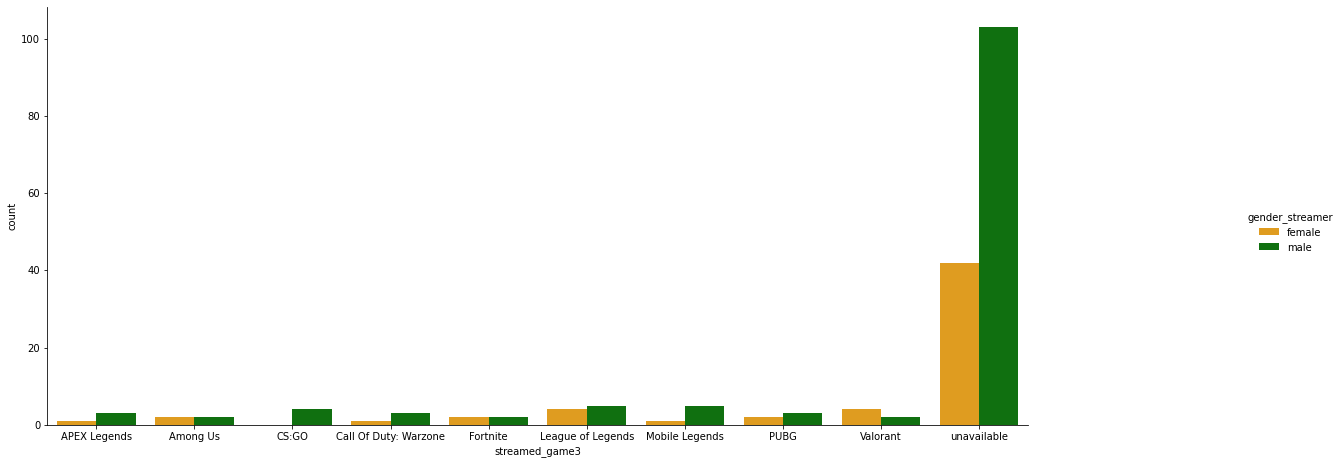

In [95]:
gender_plat3_plot = sns.catplot(x="streamed_game3", y="count",
                                   kind="bar", 
                                   hue="gender_streamer", 
                                   palette={"male": "green", "female": "orange"}, 
                                   data=top3_final10)
gender_plat3_plot.fig.set_size_inches(20, 6.5)

#### **Observation**

### Year started of the top 20 streamers (based on their followers).

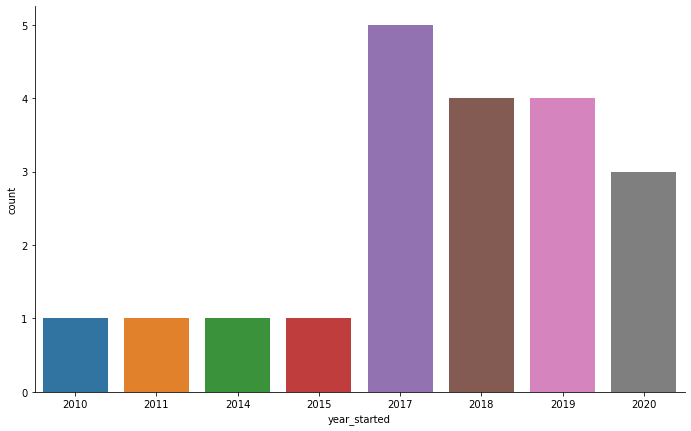

In [103]:
follower_year_plot = sns.catplot(x="year_started", kind="count", data=followers_table) # Limit the maximum y-axis value because of one outlier count for age 52
follower_year_plot.fig.set_size_inches(10, 6)

#### **Observation**

### Gender of the top 20 streamers (based on their followers).

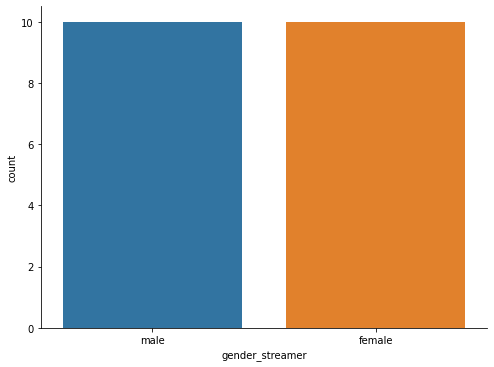

In [108]:
follower_gender_plot = sns.catplot(x="gender_streamer", kind="count", data=followers_table) # Limit the maximum y-axis value because of one outlier count for age 52
follower_gender_plot.fig.set_size_inches(7, 5)

#### **Observation**